In [92]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1 tải file dự liệu lên chương trình

In [10]:
df = pd.read_csv('total_sale_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [11]:
df['Month'] = df['Order Date'].str[0:2] # tạo thêm một cột Month từ dữ liệu của cột Order Date
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
print(set(df['Month'])) # lấy ra các số liệu từ cột Month và thấy 2 ký từ nan và Or không cần thiết 

{'11', '05', '01', '10', 'Or', '09', '08', '06', '12', '04', nan, '03', '02', '07'}


In [14]:
df = df.dropna() # câu lệnh xóa ký tự nan 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [16]:
df = df[df['Month'] !='Or'] # câu lệnh xóa ký tự Or 


In [18]:
# câu hỏi 1 : THÁNG CÓ DOANH SỐ CAO NHẤT  
# bởi vì không có cột doanh số nên cần nhân giá bán và số lượng
df["Sale"] = '' # tạo thêm một cột Sale
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,


In [19]:
# kiểm tra type của cột giá và cột số lượng thấy rằng Object không có thể
# nhân được với nhau nên cần chuyển thành type int và float 
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [21]:

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # chuyển loại dữ liệu
df['Price Each'] = pd.to_numeric(df['Price Each']) # chuyển loại dữ liệu
# Check the data types of the DataFrame
print(df.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sale                 object
dtype: object


In [24]:
# nhân giá bán với số lượng bán lại với nhau 
df['Sale'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [23]:
# di chuyển cột sale sang gần vị trí của Price Each 
moving_column = df.pop('Sale')
df.insert(4, 'Sale', moving_column) # 4 là số thứ tự được tính từ  Order ID
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [25]:
# lọc giá trị theo từng tháng bằng hàm Groupby và tính tổng của từng tháng 
df.groupby('Month').sum()['Sale']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sale, dtype: float64

In [26]:
# gán giá trị vào Sale_value 
sale_value = df.groupby('Month').sum()['Sale']
sale_value.max() # tháng có giá trị cao nhất


4613443.34

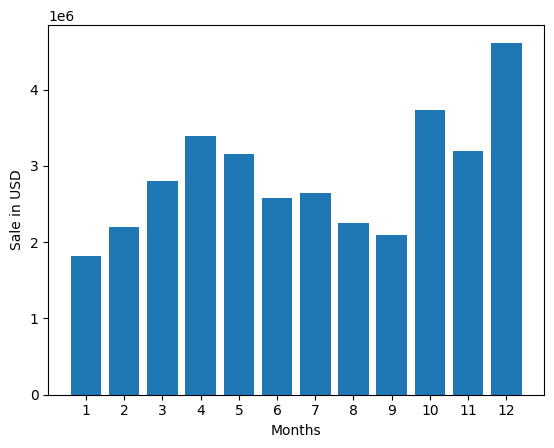

In [27]:
# Câu 1 : Biểu đồ thể hiện tháng có doanh thu cao nhất 

months = range(1,13)
plt.bar(x=months, height=sale_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sale in USD')
plt.show()

In [28]:
# Câu 2: THÀNH PHỐ NÀO CÓ DOANH THU CAO NHẤT 
# cần tách City ra khỏi hàng Purchase Address thành hàng riêng 
df['City'] = df['Purchase Address'].apply(lambda x: x.split(",")[1].strip())
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [30]:
moving_City = df.pop('City') # di chuyển cột ra khỏi dataframe và gán nó vào biến 'moving_city'
df.insert(7, 'City', moving_City) # chèn nó vào bên cạnh P.Address  6 là số thứ tự được tính từ  Order ID
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,City,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,01


In [32]:
df.groupby('City').sum()['Sale'] # nhóm các thành phố và tính tổng Sale của một thành phố 

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sale, dtype: float64

In [34]:
sale_city.max() # sale lớn nhất 

8262203.91

In [37]:
City = [City for City, Sale in sale_city.items()]
print(City)

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


In [38]:
print(City)
print(sale_city)

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']
City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sale, dtype: float64


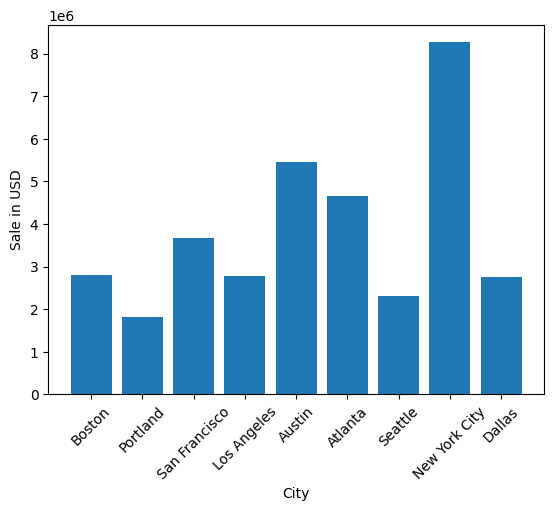

In [75]:
City = df['City'].unique()
plt.bar(x=City, height=sale_city)
plt.xticks(City, rotation=45)
plt.xlabel('City')
plt.ylabel('Sale in USD')
plt.show()

In [74]:
City = [ City for city, Sale in sale_city.items()]

In [ ]:
# thời gian nào nên được chiếu quảng cáo để có thể tăng khả năng mua hàng của khách hàng 
# chúng ta sẽ xác định xem là người mua hàng sẽ thực hiện mua và nhưng thời gian nào để có thể 
# đưa ra quyết định quảng cáo vào các khung giờ trước đó 



In [40]:
print(df['Order Date'].dtypes) # kiểm tra kiểu dữ liệu cột Order Date

object


In [68]:
#chuyển kiểu dữ liệu
df['Order Date']= pd.to_datetime(df['Order Date'])

In [69]:
df['Order Date'].dt.hour

0         21
1         14
2         13
3         20
4         11
          ..
186856    20
186857    16
186858     7
186859    17
186860     0
Name: Order Date, Length: 185950, dtype: int32

In [96]:
df['Hours'] = pd.to_datetime(df['Hours'])
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,City,Month,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,01,1970-01-01 00:00:00.000000021
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,01,1970-01-01 00:00:00.000000014
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,01,1970-01-01 00:00:00.000000013
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,01,1970-01-01 00:00:00.000000020
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,01,1970-01-01 00:00:00.000000011
...,...,...,...,...,...,...,...,...,...,...
186856,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,09,1970-01-01 00:00:00.000000020
186857,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,09,1970-01-01 00:00:00.000000016
186858,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,09,1970-01-01 00:00:00.000000007
186859,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,09,1970-01-01 00:00:00.000000017


In [98]:
# tách và tạo côt Hour mới cho df 
df["Hours"] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,City,Month,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,01,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,01,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,01,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,01,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,01,11


In [89]:
print(df['Hours'].dtypes)

int32


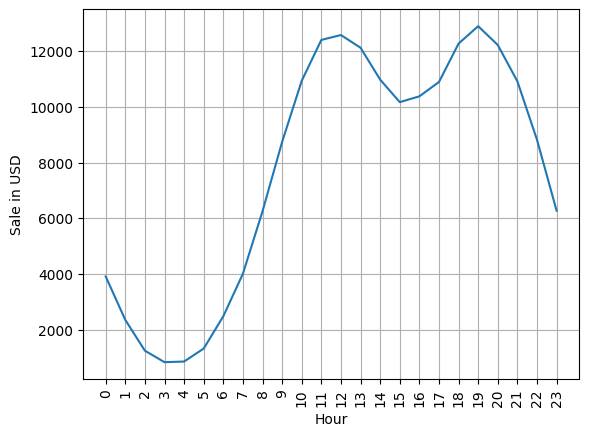

In [105]:

hours = sale_hour.index
sale_values = sale_hour.values
sale_hour = df.groupby('Hours')['Sale'].sum() # nhóm tổng sale  theo từng khung giờ 

plt.plot(hours, sale_values) # biểu đồ dàng đường
plt.xlabel('Hour')
plt.ylabel('Sale in USD')
plt.grid() # thêm dang lưới cho biểu đồ
plt.xticks(hours, rotation= 90 )  # Set x-axis ticks to the hour values
plt.show()


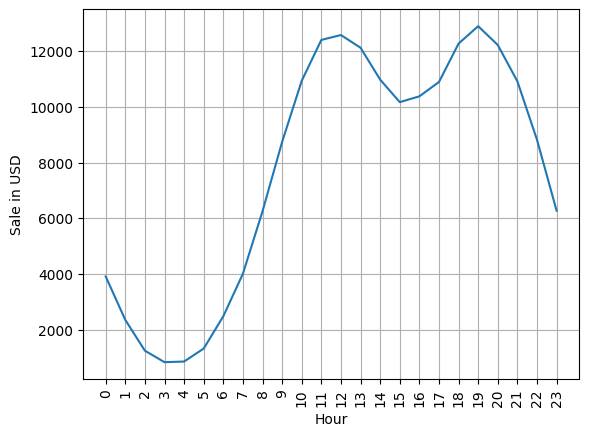

In [101]:
sale_hour = df.groupby('Hours').count()['Sale'] # nhóm cac giá trị theo từng khung giờ 
hours = [hour for hour, sale in sale_hour.items()]

plt.plot(hours, sale_hour)
plt.xticks(hours, rotation=90)
plt.xlabel('Hour')
plt.grid()
plt.ylabel('Sale in USD')
plt.show()

In [ ]:
# câu hỏi 3: NHƯNG SẢM PHẢM BÁN CÙNG NHAU ( CÙNG ĐƠN HÀNG ) 


In [106]:
df_dup = df[df['Order ID'].duplicated(keep=False)] # tìm các giá trị trùng lặp trong cột Order date 
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,City,Month,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,01,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,01,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,01,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,01,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",New York City,01,11


In [108]:
# nhóm các đơn hàng thành một hàng 
groupProduct = lambda product: ', '.join(product)
df_dup['All Products']=  df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

C:\Users\F\AppData\Local\Temp\ipykernel_25884\384246982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']=  df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,City,Month,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,01,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,01,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,01,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,01,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",New York City,01,11,"Vareebadd Phone, Wired Headphones"


In [109]:
# bỏ những dòng duplicate trong một cột All Products
df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,City,Month,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,01,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,01,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,01,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,01,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",New York City,01,11,"Vareebadd Phone, Wired Headphones"


In [110]:
# dùng value_count() để có thể trả về các giá trị thường mua cùng nhau nhất 
df_dup['All Products'].value_counts().head(10)
                                        

All Products
iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: count, dtype: int64

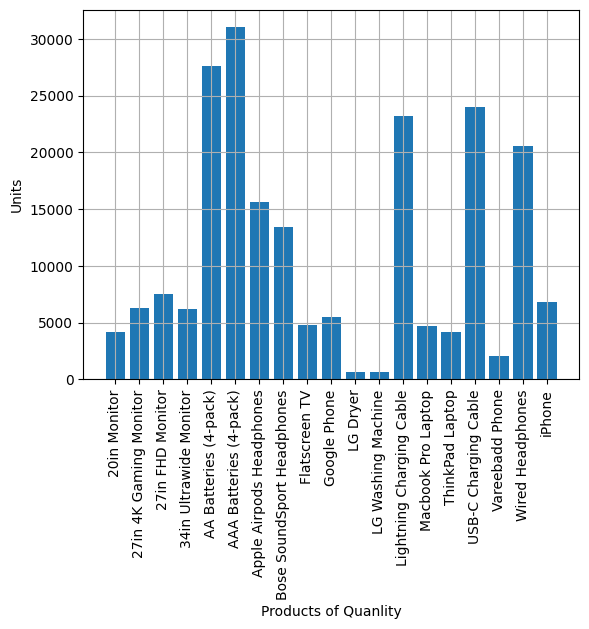

Most choice sold product: USB-C Charging Cable


In [111]:
# câu 5: SẢM PHÂM NÀO ĐƯỢC MUA NHIỀU NHẤT 
most_sold_product = df['Product'].value_counts().idxmax() # sử dụng hàm value_count() để có thể tính được số lần xuất hiện của sản phẩm trong cột Products
product_quantity = df.groupby('Product')['Quantity Ordered'].sum()

products_ls = [product for product, quant in product_quantity.items()]
plt.bar(x=products_ls, height=product_quantity)
plt.xticks(products_ls,  rotation= 90)
plt.xlabel('Products of Quanlity')
plt.ylabel('Units')
plt.grid() # thêm dang lưới cho biểu đồ
plt.show()
print("Most choice sold product:", most_sold_product)

In [112]:
# TÌM KIẾM NGUYÊN NHÂN VÌ SAO CÓ THỂ BÁN ĐƯỢC NHIỀU
# YẾU TỐ VỀ Price 
product_average_price = df.groupby('Product')['Price Each'].mean() # TÌM GIÁ TRUNG BÌNH CỦA SẢN PHẨM
product_average_price 

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [113]:
product_revenue = df.groupby('Product')['Sale'].sum()
product_highest_revenue = product_revenue.idxmax()
highest_revenue = product_revenue.max()

print("Product with highest revenue:", product_highest_revenue)
print("Total revenue:", highest_revenue)

Product with highest revenue: Macbook Pro Laptop
Total revenue: 8037600.0


In [114]:
print(df['Quantity Ordered'].dtypes)


int64


In [115]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int) # chuyển đổi kiểu dữ liệu thành INT

C:\Users\F\AppData\Local\Temp\ipykernel_25884\1859073959.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls,rotation= 90 )


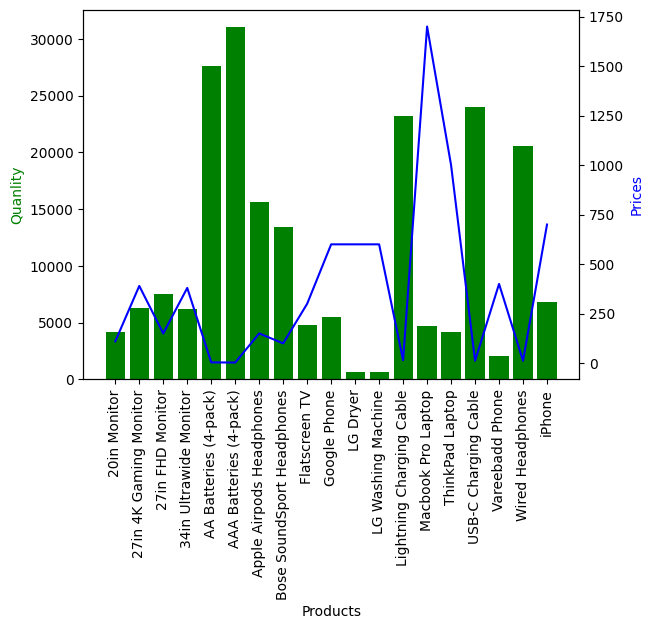

In [116]:
# VẼ BIỂU ĐỐ KẾT HỢP GIỮA CỘT VÀ ĐƯỜNG THỂ HIỆN MỐI LIÊN HỆ GIỮA GIÁ BÁN VÀ SỐ LƯỢNG BÁN 
x = products_ls
y1 = product_quantity
y2 = product_average_price

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls,rotation= 90 )
ax1.set_xlabel('Products')
ax1.set_ylabel('Quanlity', color='g')
ax2.set_ylabel('Prices', color='b')

plt.show()